# Data observation & cleaning

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np

In [2]:
data_og = pd.read_csv('adult.csv')
data=pd.read_csv('adult.csv')

In [3]:
data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


it can be observed that there are no null values for numerical features, but some categorical features have null values marked as "?"

In [5]:

n_records = data.shape[0]

n_features = data.shape[1]


n_greater_50k = data[data['income'] == '<=50K'].shape[0]


n_at_most_50k = data[data['income'] == '>50K'].shape[0]


greater_percent =  (n_greater_50k / n_records) * 100


print("Total number of records: {}".format(n_records))

print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 32561
Individuals making more than $50k: 24720
Individuals making at most $50k: 7841
Percentage of individuals making more than $50k: 75.92%


The dataset seems to be imbalanced , with 75% of values of dependent variable belonging to (>50K$) class

In [6]:
data.drop('education', inplace=True, axis=1)
data.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

We have dropped the education feature. Which is a duplicate feature of education.num, but in a nonnumerical format.
The matching education level of the education number:

1: Preschool
2: 1st-4th
3: 5th-6th
4: 7th-8th
5: 9th
6: 10th
7: 11th
8: 12th
9: HS-grad
10: Some-college
11: Assoc-voc
12: Assoc-acdm
13: Bachelors
14: Masters
15: Prof-school
16: Doctorate

In [7]:
print("Before removing duplicates:", data.duplicated().sum())

data = data[~data.duplicated()]

print("After removing duplicates:", data.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


In [8]:
# discarding spaces from entries
columns = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
for column in columns:
    data[column] = data[column].str.strip()

In [9]:
# changing "?" to Unknown
change_columns = ['workclass', 'occupation', 'native.country']
for column in change_columns:
        data[column] = data[column].replace({'?': 'Unknown'})

# Data Exploration

In [10]:
#importing necessary libraries for Data Exploration

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

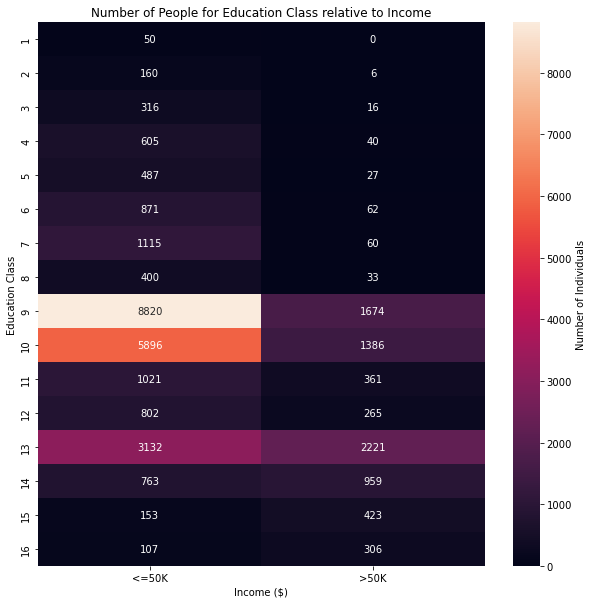

In [11]:

plt.figure(figsize=[10,10])

ct_counts = data.groupby(['education.num', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education.num', columns = 'income', values = 'count').fillna(0)

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');

In the graph above, we can see that people with education classes of 9 & 10 make up the highest portion in the dataset. Also,  notice that people with education class of 14 to 16 proportionally usually make >50k as income in the statistics we have in the dataset, unlike lesser education classes where they usually make <=50k as income. This actually make sense, confirming the validity.

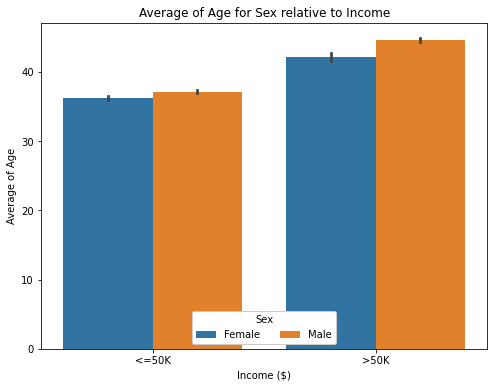

In [12]:
plt.figure(figsize=[8,6])
ax = sb.barplot(data = data, x = 'income', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

The figure shows in general that the people with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.

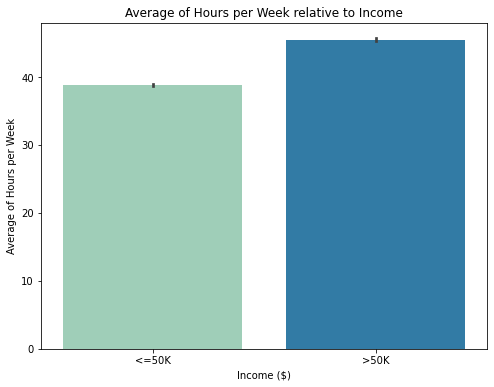

In [13]:
plt.figure(figsize=[8,6])
sb.barplot(data=data, x='income', y='hours.per.week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

We notice here that the income grows directly with the average of work hours per week, which is a pretty reasonable and logical result.

# Data Preprocessing

In [14]:
data_prep=data.copy()  #COPIED DATA FOR PRE-PROCESSING

In [15]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'fnlwgt']

scaler = MinMaxScaler()
data_prep[numerical] = scaler.fit_transform(data_prep[numerical])

In [16]:
data_prep.head()

age workclass    fnlwgt  education.num marital.status  \
0  1.000000   Unknown  0.043987              9        Widowed   
1  0.890411   Private  0.081896              9        Widowed   
2  0.671233   Unknown  0.118021             10        Widowed   
3  0.506849   Private  0.086982              4       Divorced   
4  0.328767   Private  0.171404             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0            Unknown  Not-in-family  White  Female           0.0   
1    Exec-managerial  Not-in-family  White  Female           0.0   
2            Unknown      Unmarried  Black  Female           0.0   
3  Machine-op-inspct      Unmarried  White  Female           0.0   
4     Prof-specialty      Own-child  White  Female           0.0   

   capital.loss  hours.per.week native.country income  
0      1.000000        0.397959  United-States  <=50K  
1      1.000000        0.173469  United-States  <=50K  
2      1.000000        0.397959  United-States  <=50K  
3      0.895317        0.397959  United-States  <=50K  
4      0.895317        0.397959  United-States  <=50K

In [17]:
# Encoding

from sklearn.preprocessing import LabelEncoder

data_prep['sex'] = data_prep.sex.replace({"Female": 0, "Male": 1})
data_prep['income'] = data_prep.income.replace({"<=50K": 0, ">50K": 1})

for col in data_prep.columns:
    if data_prep[col].dtypes == 'object':
        encoder = LabelEncoder()
        data_prep[col] = encoder.fit_transform(data_prep[col])

We have no followed one-hot encoding as it makes it difficult for model interpretation procedure by introducing dummy variables. Generally One-hot encoding would be preferred

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education.num   32537 non-null  int64 
 4   marital.status  32537 non-null  object
 5   occupation      32537 non-null  object
 6   relationship    32537 non-null  object
 7   race            32537 non-null  object
 8   sex             32537 non-null  object
 9   capital.gain    32537 non-null  int64 
 10  capital.loss    32537 non-null  int64 
 11  hours.per.week  32537 non-null  int64 
 12  native.country  32537 non-null  object
 13  income          32537 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.7+ MB


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split







In [20]:
import warnings
warnings.filterwarnings("ignore")

# Partioning the data
X = data_prep.drop('income', axis=1)
y = data_prep['income']

# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y)


models = {}


models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()
models['XGboost'] = XGBClassifier()

In [21]:
data_prep.head()

age  workclass    fnlwgt  education.num  marital.status  occupation  \
0  1.000000          7  0.043987              9               6          14   
1  0.890411          3  0.081896              9               6           3   
2  0.671233          7  0.118021             10               6          14   
3  0.506849          3  0.086982              4               0           6   
4  0.328767          3  0.171404             10               5           9   

   relationship  race  sex  capital.gain  capital.loss  hours.per.week  \
0             1     4    0           0.0      1.000000        0.397959   
1             1     4    0           0.0      1.000000        0.173469   
2             4     2    0           0.0      1.000000        0.397959   
3             4     4    0           0.0      0.895317        0.397959   
4             3     4    0           0.0      0.895317        0.397959   

   native.country  income  
0              38       0  
1              38       0  
2              38       0  
3              38       0  
4              38       0

In [22]:
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

LogisticRegression:
Accuracy: train:  0.8113224061811017 | test:  0.8016711708227036
F1-score: train:  0.5129439298733482 | test:  0.4468873793984828
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.999953898756532 | test:  0.8015817394515047
F1-score: train:  0.9999043240214945 | test:  0.5259721162261681
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.8635244963849609 | test:  0.8054235857200354
F1-score: train:  0.6833630883833939 | test:  0.521592391903771
---------------------------------------------------------
XGboost:
Accuracy: train:  0.9106708069504968 | test:  0.8068375941223149
F1-score: train:  0.8021799955247723 | test:  0.5438673991716304
---------------------------------------------------------


Although very low, Random forest classifier and XGBoost give us the best test accuracy among the trained models. As it appears from the exploration in our dataset that there is an imbalance between the classes of classifications. Since the individuals making more than 50k as income represent 75% of the data. So, we would try to make oversampling.

In [23]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled)

In [24]:
clf_rf = RandomForestClassifier()

results = cross_validate(clf_rf, X_resampled, y_resampled, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999746944353063 | test:  0.9104200973479507
F1-score: train:  0.9999746949475842 | test:  0.9188124895940121


In [25]:
clf_xgb = XGBClassifier()

results = cross_validate(clf_xgb, X_resampled, y_resampled, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.8998805653680686 | test:  0.8444225451854074
F1-score: train:  0.9030035268469631 | test:  0.856038004457209


As we recieve better results for random forest classifier, we go ahead with it

# Feature Engineering

In [26]:
clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)


# View a list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(X_resampled.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp


Features Importance:


feature  importance
0              age   16.092204
1        workclass    3.254311
2           fnlwgt   15.190311
3    education.num   11.979143
4   marital.status   10.274778
5       occupation    6.024299
6     relationship   13.860114
7             race    1.330219
8              sex    1.377229
9     capital.gain    8.325856
10    capital.loss    2.609593
11  hours.per.week    7.963589
12  native.country    1.718354

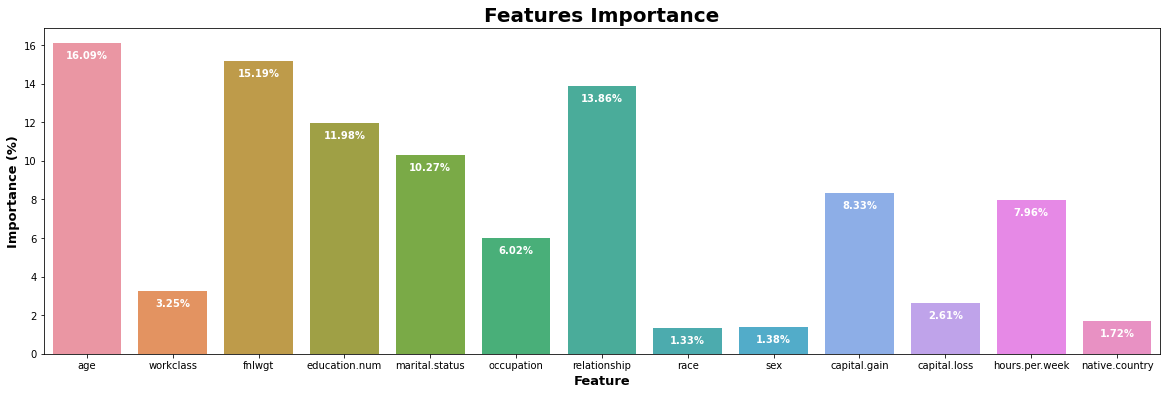

In [27]:
# Features importance plot
plt.figure(figsize=[20,6])
sb.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);


# add annotations
impo = feat_imp['importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')

dropping the features having less than 5% importance

In [28]:
data_final = data_prep.copy()

In [29]:
data_final.drop(['race', 'sex', 'capital.loss', 'native.country'], axis=1, inplace=True)

In [30]:
# Partioning
Xf = data_final.drop('income', axis=1)
yf = data_final['income']

# Oversampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(Xf, yf)


clf = RandomForestClassifier(bootstrap='false', criterion='gini')

results = cross_validate(clf, X_resampled, y_resampled, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999645722094288 | test:  0.9180715380804086
F1-score: train:  0.9999645732339519 | test:  0.9237119453191855


We observe an increase in accuracy after feature engineering

# Hyper parameter tuning - using grid search

In [31]:
from sklearn.model_selection import GridSearchCV



In [32]:




param_grid = {"max_depth": [20, 25, 50],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
best = GridSearchCV(clf, param_grid=param_grid)

best.fit(X_resampled,y_resampled)

GridSearchCV(estimator=RandomForestClassifier(bootstrap='false'),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 50]})

In [33]:
best.best_params_

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 50}

In [34]:
clf_final = RandomForestClassifier(bootstrap='false', criterion='gini')
results = cross_validate(clf_final, X_resampled, y_resampled, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999645722094289 | test:  0.9184764558034813
F1-score: train:  0.9999645740023462 | test:  0.9241519353759132


# Interpretation - skater & LIME

In [35]:
clf_XAI = RandomForestClassifier(bootstrap='false', criterion='gini', max_depth=20)
results = cross_validate(clf_XAI, X_resampled, y_resampled, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9674062961438642 | test:  0.9037180737121601
F1-score: train:  0.9683587742329178 | test:  0.9113462415571749


For interpretation to run under feasible time, we limit the amximum depth of decision tree in random forest to 20. This is the middleground for good accuracy and faster interpretation

In [36]:
clf_XAI.fit(X_train, y_train)

RandomForestClassifier(bootstrap='false', max_depth=20)

In [39]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled) 

interpreter = Interpretation(X_test, feature_names=X_train.columns)
im_model = InMemoryModel(clf_XAI.predict_proba, examples=X_train, 
                         target_names=['$50K or less', 'More than $50K'])

In [38]:
#foe interpretation we use unscaled data

data_XAI=data.copy()


# Encoding
data_XAI['income'] = data_XAI.income.replace({"<=50K": 0, ">50K": 1})

# Create dummy variables
# data_final = pd.get_dummies(data_final)

for col in data_XAI.columns:
    if data_XAI[col].dtypes == 'object':
        encoder = LabelEncoder()
        data_XAI[col] = encoder.fit_transform(data_XAI[col])
        
        
Xf = data_XAI.drop('income', axis=1)
yf = data_XAI['income']

# Oversampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(Xf, yf)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

clf_XAI.fit(X_train, y_train)

interpreter = Interpretation(X_test, feature_names=X_train.columns)
im_model = InMemoryModel(clf_XAI.predict_proba, examples=X_train, 
                         target_names=['$50K or less', 'More than $50K'])

# Global Interpretation 

[13/13] features ████████████████████ Time elapsed: 3 seconds

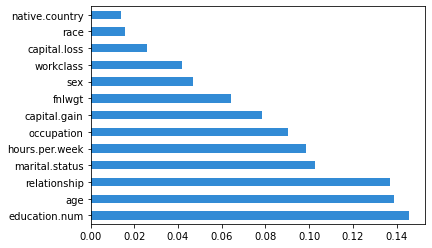

In [41]:
plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=True)

A surprising observation is that the feature importance of "fnlwgt" feature has decreased in skater's evaluation. Skater evaluation can be said logically true as "fnlwgt" represents the weight of population each row represents, this should not effect our decisions as much as seen before.

[43/43] grid cells ████████████████████ Time elapsed: 14 seconds

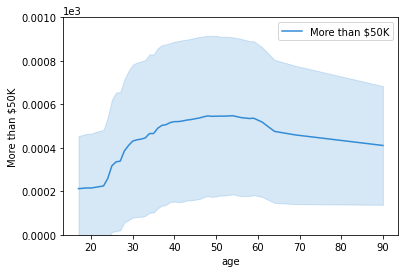

In [42]:
r = interpreter.partial_dependence.plot_partial_dependence(['age'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=23000, 
                                                           with_variance=True, figsize = (6, 4))
yl = r[0][1].set_ylim(0, 1) 

The above plot shows the relation between target variable and age. It can be observed that the middle aged people have the highest chance of earning more thank 50K. This is logically valid and hence confirms the validity of our model

[16/16] grid cells ████████████████████ Time elapsed: 10 seconds

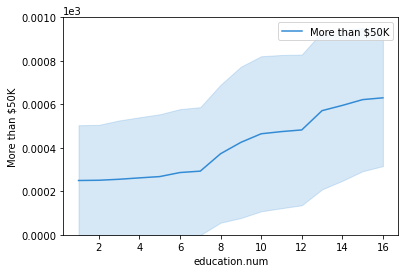

In [43]:
r = interpreter.partial_dependence.plot_partial_dependence(['education.num'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=23000, 
                                                           with_variance=True, figsize = (6, 4))
yl = r[0][1].set_ylim(0, 1)

Unsurprisingly higher the education, the more chance of making money

[8/8] grid cells ████████████████████ Time elapsed: 8 seconds

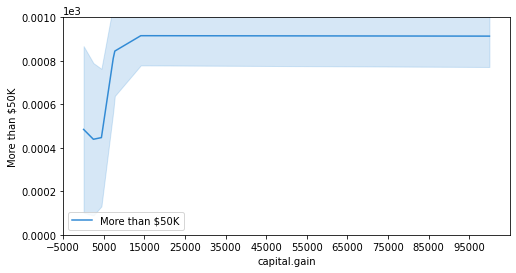

In [44]:
r = interpreter.partial_dependence.plot_partial_dependence(['capital.gain'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), 
                                                           with_variance=True, figsize = (8, 4), n_samples=23000)
yl = r[0][1].set_ylim(0, 1) 
s, e = r[0][1].get_xlim()
xl = r[0][1].set_xticks(np.arange(s, e, 10000))

Unsurprisingly higher the capital gain, the more chance of making money, there is a steep rise in around $5K — $8K.

In [45]:
pd.concat([data_final[['relationship']], data[['relationship']]], 
          axis=1).drop_duplicates()

relationship    relationship
0             1   Not-in-family
2             4       Unmarried
4             3       Own-child
7             2  Other-relative
23            0         Husband
48            5            Wife

[6/6] grid cells ████████████████████ Time elapsed: 8 seconds

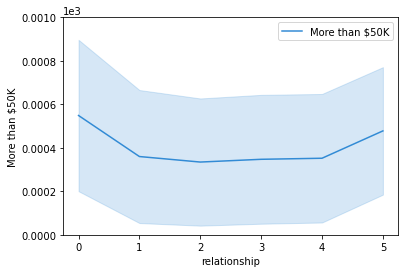

In [46]:

r = interpreter.partial_dependence.plot_partial_dependence(['relationship'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=23000, 
                                                           with_variance=True, figsize = (6, 4))
yl = r[0][1].set_ylim(0, 1) 


It's very interesting that married people (husband-wife) have a better possibility of generating more money than others!

[50/50] grid cells ████████████████████ Time elapsed: 16 seconds

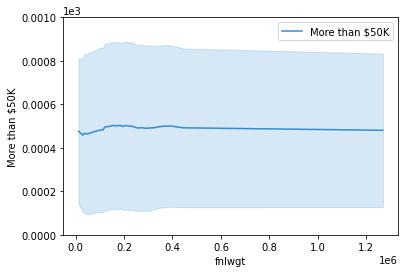

In [47]:

r = interpreter.partial_dependence.plot_partial_dependence(['fnlwgt'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=23000, 
                                                           with_variance=True, figsize = (6, 4))
yl = r[0][1].set_ylim(0, 1) 


"fnlwgt" doesnot have any significat influence in predictions

[1504/1504] grid cells ████████████████████ Time elapsed: 106 seconds

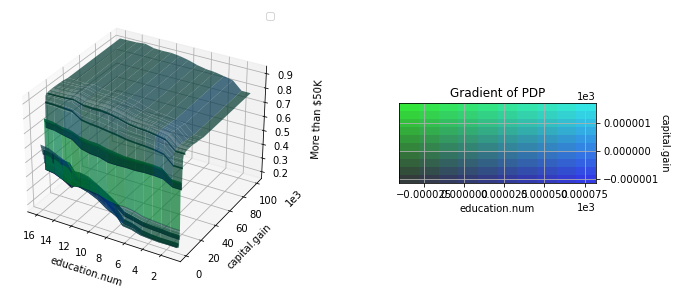

In [48]:

plots_list = interpreter.partial_dependence.plot_partial_dependence([('education.num', 'capital.gain')], 
                                                                    im_model, grid_range=(0,1), 
                                                                    n_samples=23000,
                                                                    figsize=(12, 5),
                                                                    grid_resolution=100)

Basically having a better education and more capital gain leads to you making more money!

[1136/1136] grid cells ████████████████████ Time elapsed: 89 seconds

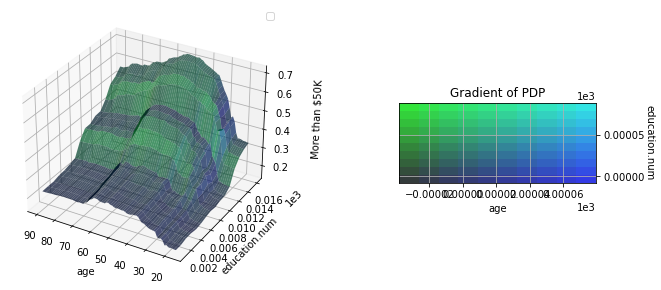

In [49]:
plots_list = interpreter.partial_dependence.plot_partial_dependence([('age', 'education.num')], 
                                                                    im_model, grid_range=(0,1), 
                                                                    n_samples=23000,
                                                                    figsize=(12, 5),
                                                                    grid_resolution=100)

It's interesting to observe that higher education levels and middle-aged people (30-50) have the best chances of producing more money!

# Local Interpretation

In [50]:

from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

In [51]:
exp = LimeTabularExplainer(X_test.values, feature_names=list(X_train.columns), 
                           discretize_continuous=True, 
                           class_names=['$50K or less', 'More than $50K'])

In [52]:
predictions= clf_XAI.predict(X_test)

In [76]:
doc_num = 10
print('Actual Label:', y_test.values[doc_num])
print('Predicted Label:', predictions[doc_num])
exp.explain_instance(X_test.iloc[doc_num].values,clf_XAI.predict_proba).show_in_notebook()

Actual Label: 1
Predicted Label: 1


In [54]:
doc_num = 67
print('Actual Label:', y_test.values[doc_num])
print('Predicted Label:', predictions[doc_num])
exp.explain_instance(X_test.iloc[doc_num].values, clf_XAI.predict_proba).show_in_notebook()

Actual Label: 0
Predicted Label: 0


# SHAP

In [55]:
import shap
shap.initjs()


In [56]:
explainer = shap.TreeExplainer(clf_XAI)

In [57]:
shap_values = explainer.shap_values(X_test)

In [58]:
shap_values_1=shap_values[1]

In [59]:
# shap_values_0=shap_values[0]

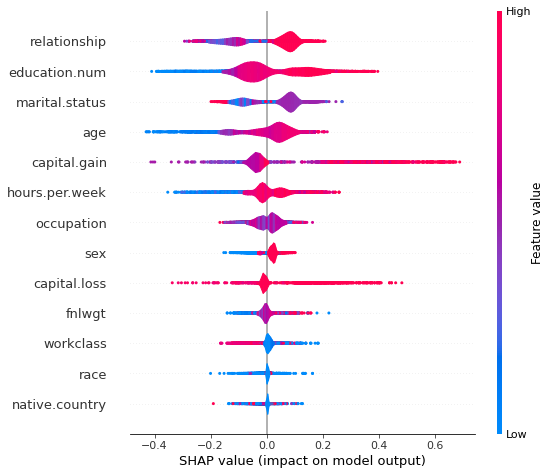

In [60]:
shap.summary_plot(shap_values_1, X_test, plot_type='violin')

It is worth noting that the age and married status features have a greater overall model impact than the capital gain feature, but in samples where capital gain counts, it has a greater influence than age or marital status. In other words, capital gain has a substantial impact on a few forecasts, but age or married status has a lower impact on all predictions.

In [61]:

# shap.force_plot(explainer.expected_value[0], 
#                  shap_values_0[2,:], X_test.iloc[2,:])

In [78]:

shap.force_plot(explainer.expected_value[1], 
                 shap_values_1[10,:], X_test.iloc[10,:])

SHAP provides a good explanation above of which features were most significant in the model making the accurate judgement of forecasting the person's income as less than $50,000. The explanation below explains how each feature contributes to pushing the model output from the base value (the average model output across the training dataset we gave) to the actual model output. Features that influence the forecast are highlighted in red, while those that influence the prediction are represented in blue.

In [63]:
shap.force_plot(explainer.expected_value[1], 
                shap_values_1[0,:], X_test.iloc[0,:])

In [64]:
shap.force_plot(explainer.expected_value[1], 
                shap_values_1[:500,:], X_test.iloc[:500,:])

-- The first 100 test subjects are all likely to earn more than $50,000, be married, have a good capital gain, or have a higher education level!

-- The following 170+ test samples are all likely to make less than or equal to $50,000, and they are generally unmarried, young, or divorced!

-- The next 310+ test samples have an inclination towards mostly earning more than $50K and they are of diverse profiles including married folks, people with different age and education levels and occupation. Most dominant features pushing the model towards making a prediction for higher income is the person being married i.e. relationship: husband or wife!

we can find out patterns which lead to the model making specific decisions and being able to provide explanations for them.

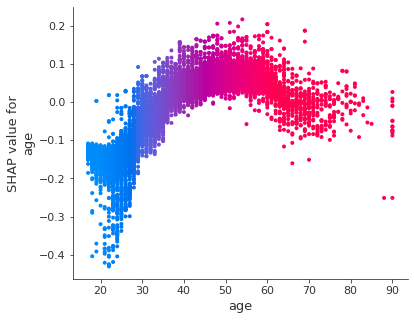

In [65]:
shap.dependence_plot(ind='age', interaction_index='age',
                     shap_values=shap_values_1, 
                     features=X_test,  
                     display_features=X_test)

as seen in skater partial dependence plot, middle aged people have higher shap values, meaning they have higher chance of earning >50K.

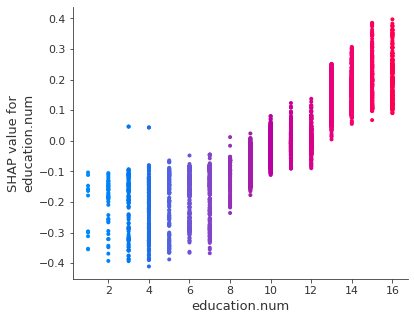

In [66]:
shap.dependence_plot(ind='education.num', interaction_index='education.num',
                     shap_values=shap_values_1, 
                     features=X_test,  
                     display_features=X_test)

Higher education meaning higher chances of lying under class 1

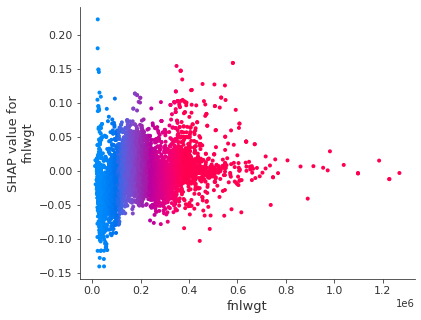

In [67]:
shap.dependence_plot(ind='fnlwgt', interaction_index='fnlwgt',
                     shap_values=shap_values_1, 
                     features=X_test,  
                     display_features=X_test)

as seen in pdp of skater, final weight have no significant trend 

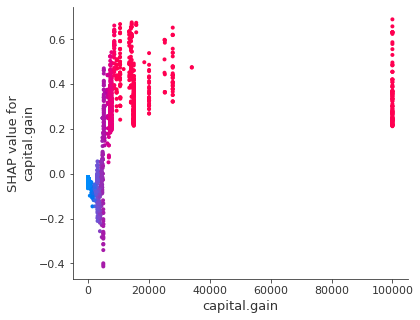

In [68]:
shap.dependence_plot(ind='capital.gain', interaction_index='capital.gain',
                     shap_values=shap_values_1, 
                     features=X_test,  
                     display_features=X_test)

capital gain have a very different trend, a sudden rise of chances is seen at certain values

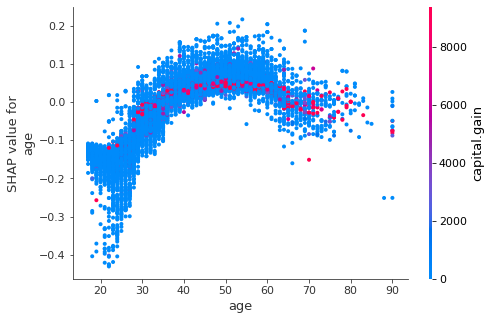

In [69]:
shap.dependence_plot(ind='age', interaction_index='capital.gain', 
                     shap_values=shap_values_1, features=X_test, 
                     display_features=X_test)

It's interesting to note that the larger the capital gain, and the middle-aged people (30-50) have the best possibility of producing more money!

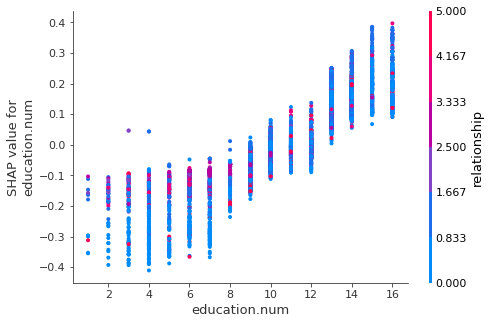

In [70]:
shap.dependence_plot(ind='education.num', interaction_index='relationship', 
                     shap_values=shap_values_1, features=X_test, 
                     display_features=X_test)

both the features are similar in some context, we can see typically married people with relationship status of either husband or wife having the highest chance of making more money!

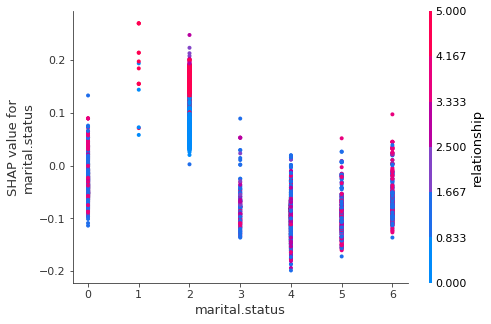

In [71]:
shap.dependence_plot(ind='marital.status', interaction_index='relationship', 
                     shap_values=shap_values_1, features=X_test, 
                     display_features=X_test)

higher education levels and husband or wife (married) people have the best chances of producing more money

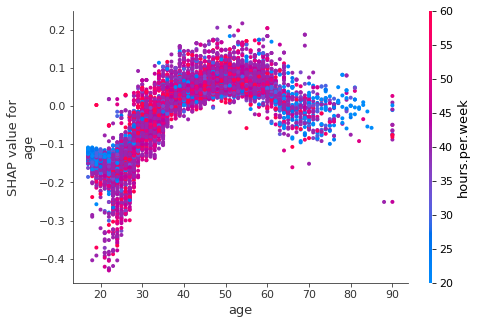

In [72]:
shap.dependence_plot(ind='age', interaction_index='hours.per.week', 
                     shap_values=shap_values_1, features=X_test, 
                     display_features=X_test)

middle-aged people working the most make the most money